# [The flexible interface](https://www.mackelab.org/sbi/tutorial/02_flexible_interface/)

In [1]:
import torch

from sbi.inference import SNPE, prepare_for_sbi
from sbi.utils.get_nn_models import posterior_nn
import sbi.utils as utils

Next, we define the prior and simulator:

In [2]:
num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), 
                         high=2*torch.ones(num_dim))

In [3]:
def linear_gaussian(theta):
    return theta + 1.0 + torch.randn_like(theta) * 0.1

In [4]:
simulator, prior = prepare_for_sbi(linear_gaussian, prior)

In [5]:
inference = SNPE(simulator, prior)

In [6]:
posterior = inference(num_simulations=500, proposal=None)


Neural network successfully converged after 181 epochs.


Once we have obtained the posterior, we can `.sample()`, `.log_prob()`, or `.pairplot()` in the same way as for the simple interface.

In [7]:
x_o = torch.zeros(3,)

In [8]:
posterior_samples = posterior.sample((10000,), x=x_o)

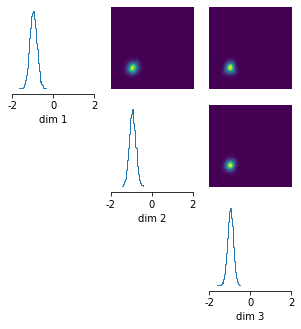

In [9]:
# plot posterior samples
_ = utils.pairplot(posterior_samples, limits=[[-2,2],[-2,2],[-2,2]], 
                   fig_size=(5,5))

In [10]:
print(posterior)


Posterior conditional density p(θ|x) (amortized).

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.
